In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
datapath = '~/Desktop/interview-prep/data-science/Code/Advertising.csv'
data = pd.read_csv(datapath, index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
def scatter_plot(feature): 
    plt.figure(figsize = (10, 5))
    plt.scatter(data[feature], data['Sales'], c = 'black')
    plt.xlabel(f'Money spent on {feature} ads ($)')
    plt.ylabel(f'Sales (k$)')
    plt.show()

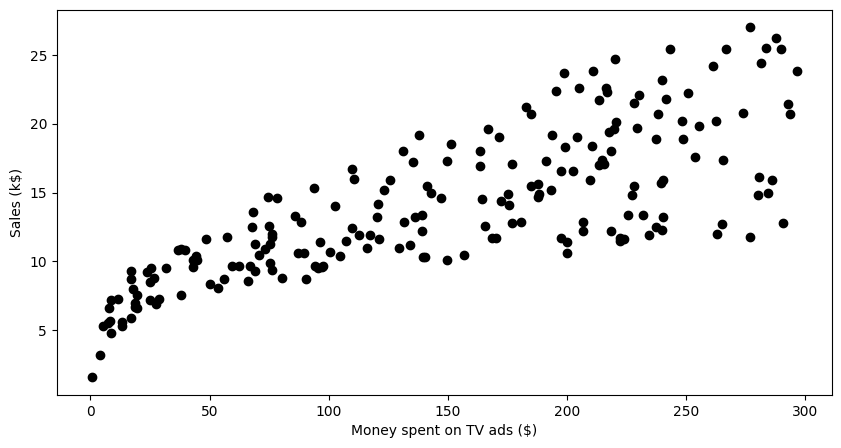

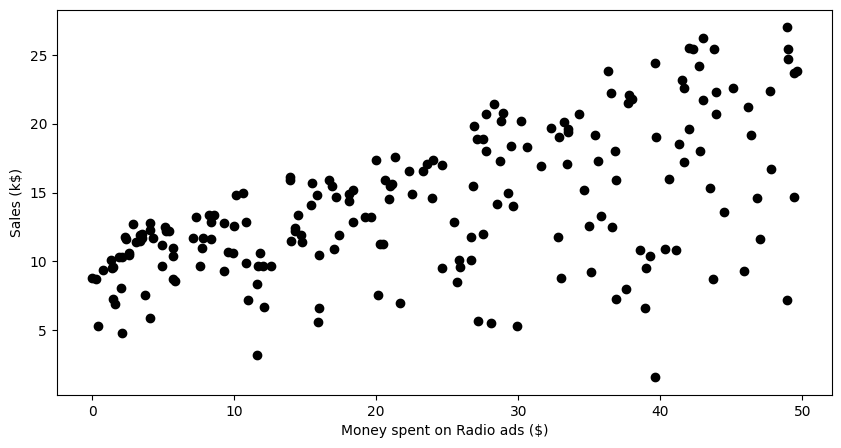

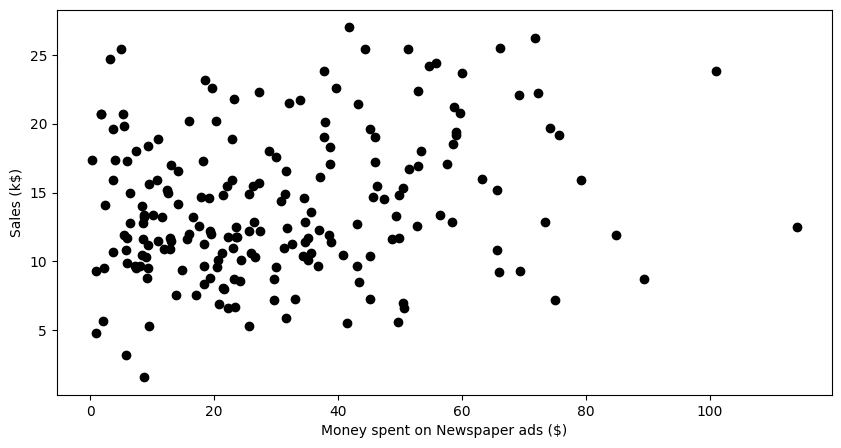

In [8]:
scatter_plot('TV')
scatter_plot('Radio')
scatter_plot('Newspaper')

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [11]:
X = data.drop(['Sales'], axis = 1)
y = data['Sales'].values.reshape(-1, 1)

In [13]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X, y, scoring = 'neg_mean_squared_error', cv = 5)

mean_MSE = np.mean(MSEs)
print(-mean_MSE)

3.0729465971002097


In [16]:
## Regularization

###Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [17]:

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)

ridge_regressor.fit(X, y)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,20


In [18]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)


{'alpha': 20}
-3.072671338341143


In [19]:
###Lasso
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso(tol = 0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, y)

,estimator,Lasso(tol=0.05)
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [23]:
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191
